In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('plot_RF.csv')
df=df.iloc[:,1:]
df.head()

,BCT_Code,Ridership,MonthS,DOWS,y_pred
0,1000201,228,1,0,197.02
1,1000201,230,1,2,205.62
2,1000201,229,1,3,211.83
3,1000201,191,1,4,184.04
4,1000201,148,1,5,163.24


In [57]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Autumn',
               10: 'Autumn',
               11: 'Autumn',
               12: 'Winter'}
df['Season'] = df['MonthS'].apply(lambda x: season_dict[x])

In [59]:
dow_dict = {1: 'Weekday',
               2: 'Weekday',
               3: 'Weekday', 
               4: 'Weekday',
               5: 'Weekday',
               6: 'Weekend',
               0: 'Weekend'}
df['DOW']=df['DOWS'].apply(lambda x: dow_dict[x])

In [63]:
season=df.groupby(['Season','BCT_Code'])[['Ridership','y_pred']].sum()
season.reset_index(inplace=True)
dow=df.groupby(['DOW','BCT_Code'])[['Ridership','y_pred']].sum()
dow.reset_index(inplace=True)

In [64]:
import geopandas as gpd
city=pd.read_csv('CTGeo.csv')
city.head(2)

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-74.04387761639944 40.69018767...,1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06
1,MULTIPOLYGON (((-73.98449647076764 40.70950966...,2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05


In [65]:
geo=pd.merge(city,season,left_on='BoroCT2020', right_on='BCT_Code',how='right')

geo['the_geom'] = gpd.GeoSeries.from_wkt(geo['the_geom'])
geo = gpd.GeoDataFrame(geo, geometry='the_geom')
geo=geo.set_crs('epsg: 4326')

In [66]:
spring=geo[geo['Season'] == 'Spring']
summer=geo[geo['Season'] == 'Summer']
autumn=geo[geo['Season'] == 'Autumn']
winter=geo[geo['Season'] == 'Winter']

In [67]:
city['the_geom'] = gpd.GeoSeries.from_wkt(city['the_geom'])
city = gpd.GeoDataFrame(city, geometry='the_geom')
city=city.set_crs('epsg: 4326')

In [78]:
max(spring['Ridership'].max(),spring['y_pred'].max())
min(spring['Ridership'].min(),spring['y_pred'].min())

112

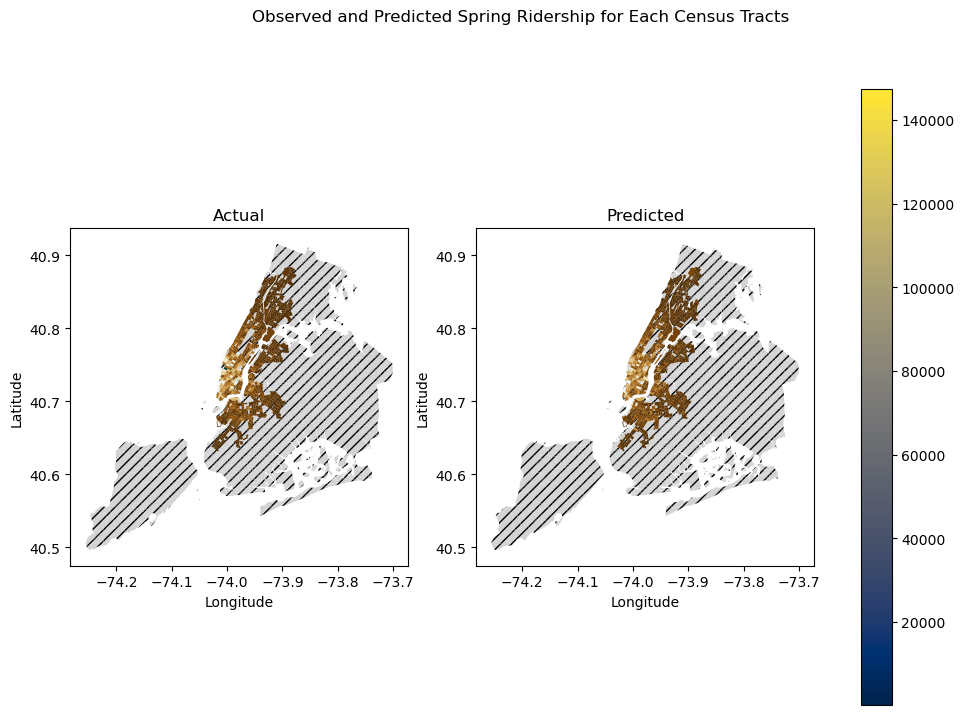

In [104]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
vmin = min(spring['Ridership'].min(),spring['y_pred'].min())
vmax = max(spring['Ridership'].max(),spring['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = spring.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = spring.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Spring Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)


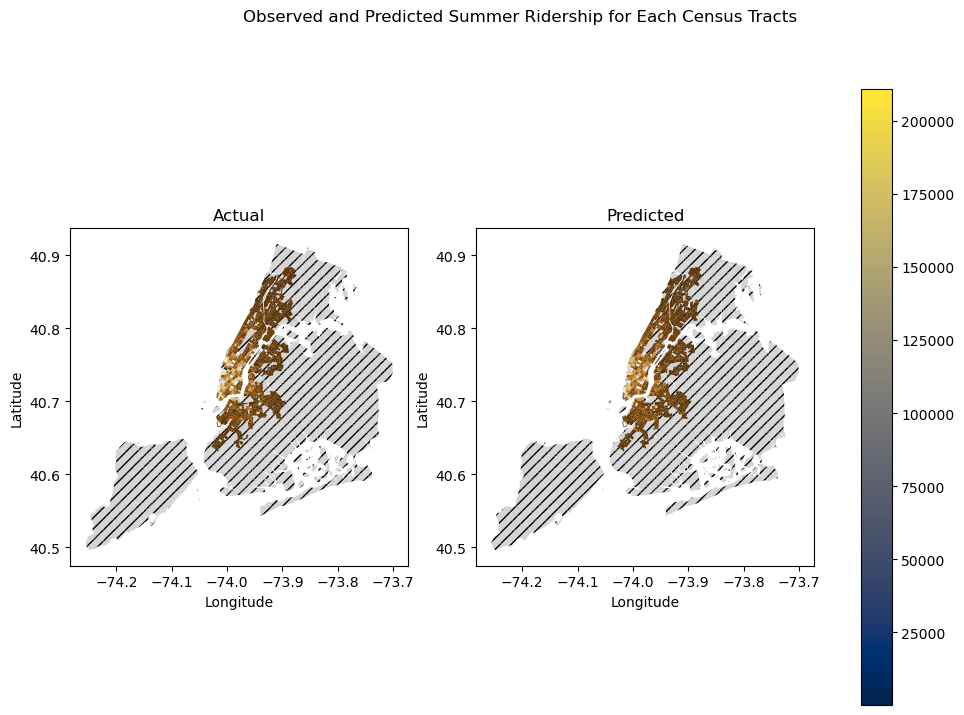

In [105]:

vmin = min(summer['Ridership'].min(),summer['y_pred'].min())
vmax = max(summer['Ridership'].max(),summer['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = summer.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = summer.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Summer Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)


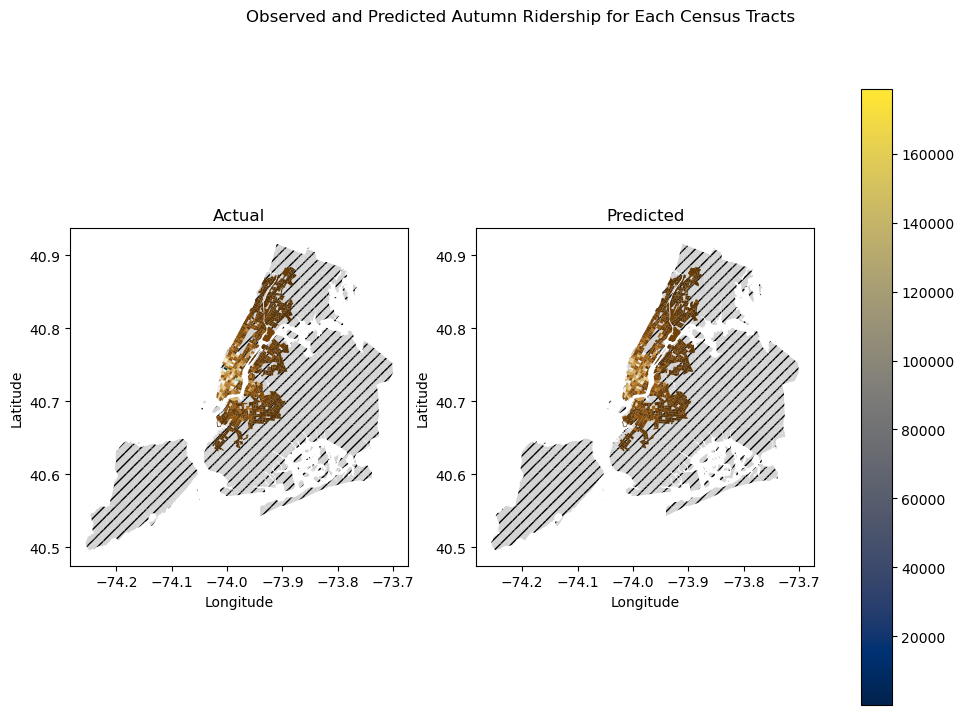

In [106]:

vmin = min(autumn['Ridership'].min(),autumn['y_pred'].min())
vmax = max(autumn['Ridership'].max(),autumn['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = autumn.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = autumn.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Autumn Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)


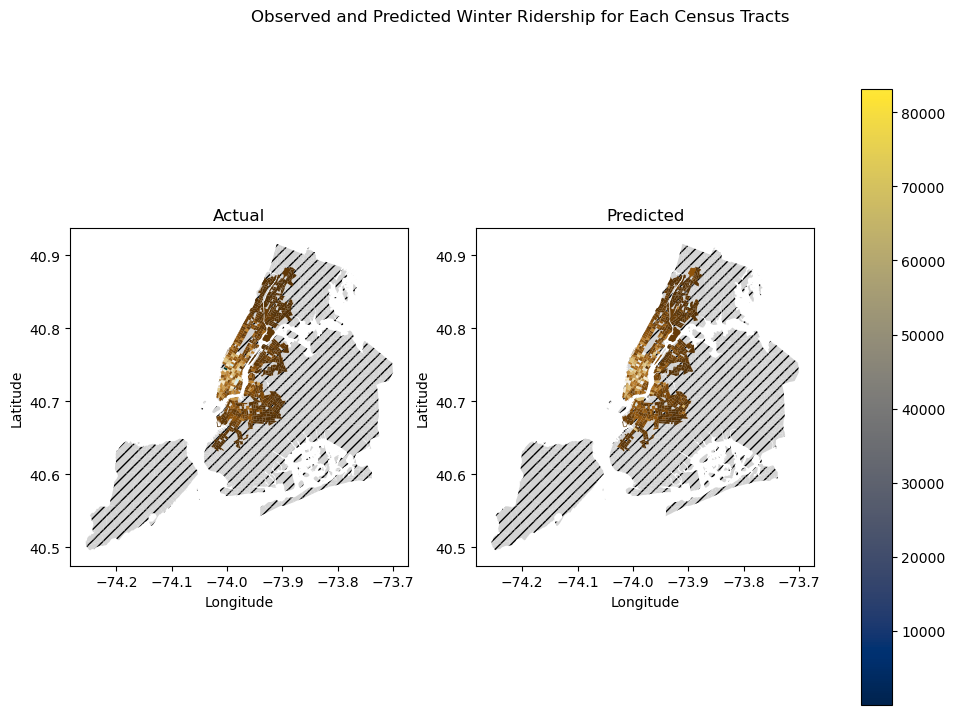

In [107]:
vmin = min(winter['Ridership'].min(),winter['y_pred'].min())
vmax = max(winter['Ridership'].max(),winter['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = winter.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = winter.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Winter Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)


In [96]:
geo=pd.merge(city,dow,left_on='BoroCT2020', right_on='BCT_Code',how='right')
weekday=geo[geo['DOW'] == 'Weekday']
weekend=geo[geo['DOW'] == 'Weekend']


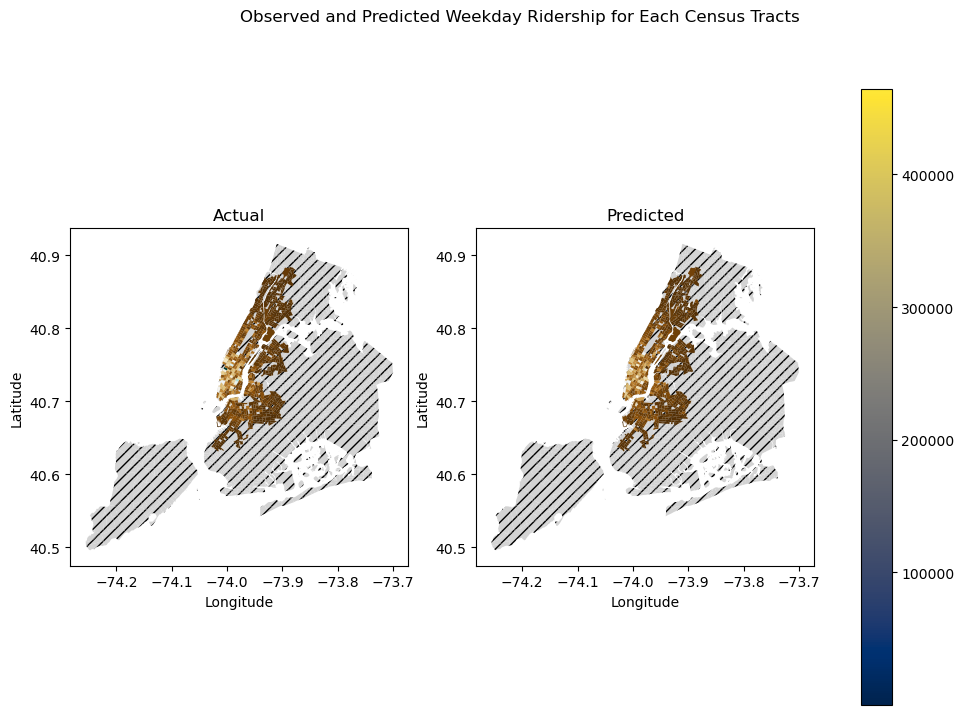

In [108]:
vmin = min(weekday['Ridership'].min(),weekday['y_pred'].min())
vmax = max(weekday['Ridership'].max(),weekday['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = weekday.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = weekday.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Weekday Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)


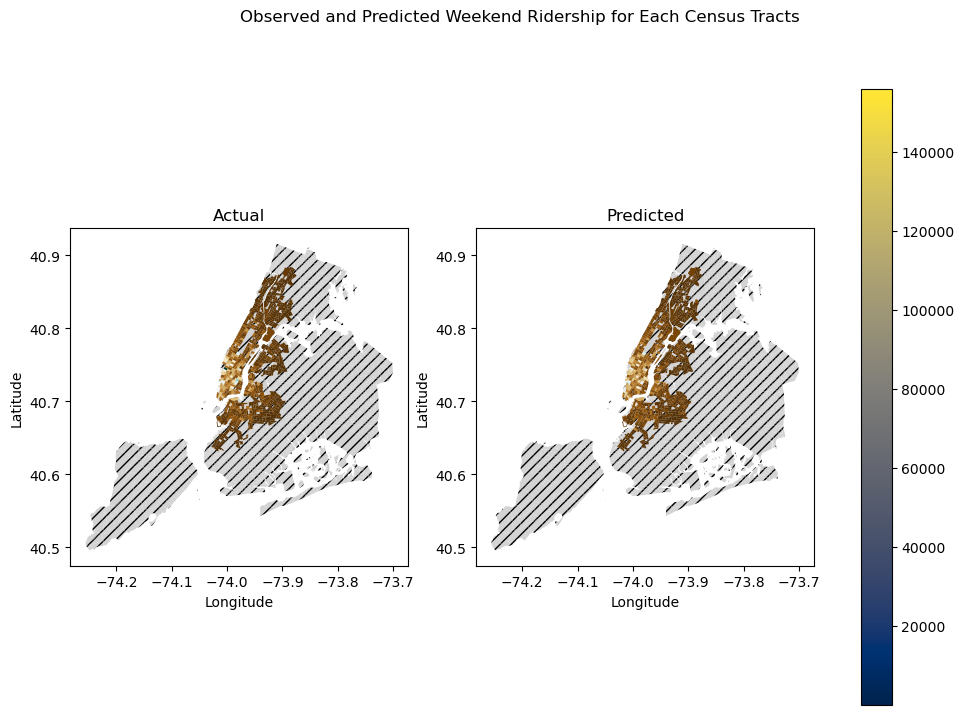

In [109]:
vmin = min(weekend['Ridership'].min(),weekend['y_pred'].min())
vmax = max(weekend['Ridership'].max(),weekend['y_pred'].max())
fig, ax = plt.subplots(1,2,figsize=(12,8))
city.plot(ax=ax[0], color='LightGrey',hatch='///')
city.plot(ax=ax[1], color='LightGrey',hatch='///')
sm1 = weekend.plot(ax = ax[0], column='Ridership', cmap = 'BrBG',vmin=vmin,vmax=vmax)
sm2 = weekend.plot(ax = ax[1], column='y_pred', cmap = 'BrBG',vmin=vmin,vmax=vmax)

fig.suptitle('Observed and Predicted Weekend Ridership for Each Census Tracts', fontsize=12)
ax[0].set_xlabel('Longitude', fontsize=10)
ax[1].set_xlabel('Longitude', fontsize=10)
ax[0].set_ylabel('Latitude', fontsize=10)
ax[1].set_ylabel('Latitude', fontsize=10)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin, vmax), cmap='cividis'),ax=ax)
